# Automated Anomaly Detection
**Objective**: Understand and practice automated anomaly detection using various techniques.

**Task**: Automated Anomaly Detection using Z-score method

**Steps**:
1. Data Set: Download a dataset representing daily sales figures for a retail store.
2. Calculate Z-score: Compute the mean and standard deviation of the sales. Use these to
calculate the Z-score for each day's sales figure.
3. Identify Anomalies: Detect anomalies by identifying values with a Z-score above 3 or below -3.
4. Visualize: Plot a graph to visualize anomalies.

Identified Anomalies:
          Date       Sales        Mean    StdDev    ZScore Anomaly
43  2024-02-13  143.187181  100.399306  9.831361  4.352182     Yes
57  2024-02-27  138.640873  100.399306  9.831361  3.889753     Yes
116 2024-04-26  144.519141  100.399306  9.831361  4.487663     Yes
133 2024-05-13  143.371653  100.399306  9.831361  4.370946     Yes


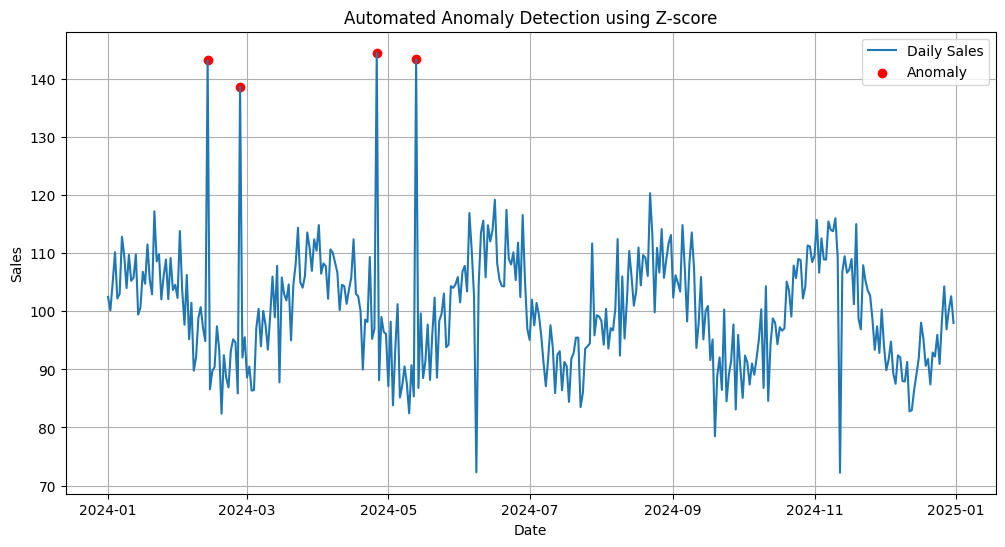

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate sample data (replace with your actual data)
np.random.seed(42)  # for reproducibility
dates = pd.to_datetime(pd.date_range(start='2024-01-01', end='2024-12-31', freq='D'))
sales = 100 + 10 * np.sin(np.linspace(0, 10 * np.pi, len(dates))) + 5 * np.random.randn(len(dates))

# Introduce some anomalies
sales[np.random.randint(0, len(sales), 5)] += 50  # Positive anomalies
sales[np.random.randint(0, len(sales), 3)] -= 40  # Negative anomalies

df = pd.DataFrame({'Date': dates, 'Sales': sales})

# Step 2: Calculate Z-score
df['Mean'] = df['Sales'].mean()
df['StdDev'] = df['Sales'].std()
df['ZScore'] = (df['Sales'] - df['Mean']) / df['StdDev']

# Step 3: Identify Anomalies
threshold = 3
df['Anomaly'] = df['ZScore'].apply(lambda x: 'Yes' if abs(x) > threshold else 'No')
anomalies = df[df['Anomaly'] == 'Yes']

print("Identified Anomalies:")
print(anomalies)

# Step 4: Visualize Anomalies
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Sales'], label='Daily Sales')
plt.scatter(anomalies['Date'], anomalies['Sales'], color='red', label='Anomaly')
plt.title('Automated Anomaly Detection using Z-score')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()